In [12]:
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns            
from scipy import stats          # For statistics

import plotly.graph_objs as go
from plotly.tools import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import BaggingClassifier
#from mlens.ensemble import BlendEnsemble
#from vecstack import stacking

from collections.abc import Sequence
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.metrics import confusion_matrix,f1_score,roc_curve, auc, precision_recall_curve,accuracy_score
from sklearn.model_selection import train_test_split,KFold,LeaveOneOut,LeavePOut # 数据集划分方法
from sklearn.model_selection import cross_val_score,cross_validate # 计算交叉验证下的测试误差
from sklearn import preprocessing
import sklearn.linear_model as LM
from sklearn import neighbors
pd.set_option('display.max_columns',40)

from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,accuracy_score,roc_curve,confusion_matrix
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler
import os 
from lightgbm.sklearn import LGBMClassifier
from sklearn.impute import SimpleImputer
import math
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



In [13]:
import xgboost

In [14]:
seed = 24

In [15]:
train_data = pd.read_csv('C:\\Users\\shiny\\Desktop\\LXM\\20220917\\train_data.csv')
test_data = pd.read_csv('C:\\Users\\shiny\\Desktop\\LXM\\20220917\\test_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\shiny\\Desktop\\LXM\\20220917\\train_data.csv'

In [ ]:
X_train = train_data.iloc[:,np.r_[1:13]]
y_train = train_data[['status']]
X_test = test_data.iloc[:,np.r_[1:13]]
y_test = test_data[['status']]


In [ ]:
##LR model 1
LR = LogisticRegression(penalty='l2',
                        tol=0.0001,
                        C=21.544346900318832,
                        solver="liblinear",
                        max_iter=10000) 
LR.fit(X_train, y_train)
LR_y_proba=LR.predict_proba(X_train)
LR_y_pre=LR.predict(X_train)
print(confusion_matrix(y_train, LR_y_pre))
LR_score = LR.score(X_train, y_train)
LR_accuracy_score=accuracy_score(y_train,LR_y_pre)
LR_preci_score=precision_score(y_train,LR_y_pre)
LR_recall_score=recall_score(y_train,LR_y_pre)
LR_f1_score=f1_score(y_train,LR_y_pre)
LR_auc=roc_auc_score(y_train,LR_y_proba[:,1])


print('LR_accuracy_score:%.3f,LR_preci_score:%.3f,LR_recall_score:%.3f,LR_f1_score:%.3f,LR_auc:%.3f'
      %(LR_accuracy_score,LR_preci_score,LR_recall_score,LR_f1_score,LR_auc))

In [ ]:
##XGB model 6
XGB=XGBClassifier(learning_rate=0.6,
                    n_estimators=250,
                    colsample_bytree=0.5,
                    max_depth=5,
                    min_child_weight=2,
                    gamma=0.1,
                    random_state=seed,
                     subsample=0.3) 
XGB.fit(X_train,y_train)
XGB_y_pre=XGB.predict(X_train)
XGB_accuracy_score=accuracy_score(y_train,XGB_y_pre)
XGB_preci_score=precision_score(y_train,XGB_y_pre)
XGB_recall_score=recall_score(y_train,XGB_y_pre)
XGB_f1_score=f1_score(y_train,XGB_y_pre)
XGB_auc=roc_auc_score(y_train,XGB_y_pre)


print('XGB_accuracy_score:%.3f,XGB_preci_score:%.3f,XGB_recall_score:%.3f,XGB_f1_score: %.3f,XGB_auc: %.3f'
      %(XGB_accuracy_score,XGB_preci_score,XGB_recall_score,XGB_f1_score,XGB_auc))

In [ ]:
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

In [ ]:
params = {"learning_rate":0.6,
                    "n_estimators":250,
                    'colsample_bytree':0.5,
                    'max_depth':5,
                    "min_child_weight":2,
                    "gamma":0.1,
                    "random_state":seed,
                    "subsample":0.3} 


In [ ]:
model = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

In [ ]:
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

In [ ]:
import numpy as np
import matplotlib.pylab as pl

# print the JS visualization code to the notebook
shap.initjs()

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

In [ ]:
fig = plt.subplots(figsize=(6,6),dpi=200)



In [ ]:
ax = shap.summary_plot(shap_values_cat_train, X_train,plot_type="dot")

NameError: name 'shap' is not defined

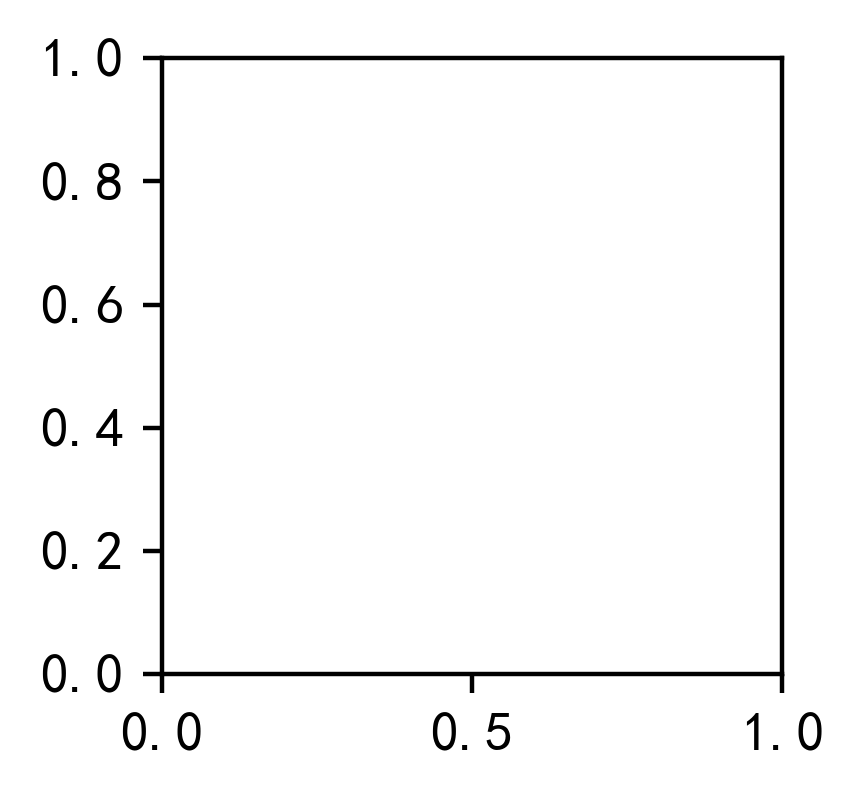

In [11]:
fig = plt.subplots(figsize=(2,2),dpi=400)

plot = shap.summary_plot(shap_values, X_train)
plot